In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(['Thor Hathodawala is looking for a job'])
v.vocabulary_


{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [ ]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [8]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
  doc = nlp(text)
  filtered_tokens=[]
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    else:
      filtered_tokens.append(token.lemma_)

  return(" ").join(filtered_tokens)


In [13]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

preprocessed_corpus = [
    preprocess(text) for text in corpus
]

preprocessed_corpus



['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [15]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(preprocessed_corpus)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [17]:
import pandas as pd
from google.colab import files
files=files.upload()
df = pd.read_json('news_dataset.json')
df

Saving news_dataset.json to news_dataset.json


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME
...,...,...
12690,Coach Shakes Hands Of Imaginary Players After ...,SPORTS
12691,This Minivan-Sized Sea Sponge Is Thought To Be...,SCIENCE
12692,RECAP: Dramatic Eclipse Photos Don't miss the ...,SCIENCE
12693,Richard Sherman Wants To Talk About Police Sho...,SPORTS


In [18]:
df.category.value_counts()

,count
category,
BUSINESS,4254
SPORTS,4167
CRIME,2893
SCIENCE,1381


In [19]:
coloumns_no = 1381
df_business = df[df.category == 'BUSINESS'].sample(coloumns_no, random_state=2022)
df_sports = df[df.category == 'SPORTS'].sample(coloumns_no, random_state=2022)
df_crime = df[df.category == 'CRIME'].sample(coloumns_no, random_state=2022)
df_science = df[df.category == 'SCIENCE'].sample(coloumns_no, random_state=2022)

In [20]:
df = pd.concat([df_business, df_crime, df_science, df_sports], axis=0)
df

,text,category
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS
2912,From the Other Side; an Honest Review from Emp...,BUSINESS
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS
502,How to Market Your Business While Traveling th...,BUSINESS
5279,How to Leverage Intuition in Decision-making I...,BUSINESS
...,...,...
4052,The Problem With Asking Football Players To Ac...,SPORTS
2292,NFL Clubs Seek to Feed at the Public Trough On...,SPORTS
10994,Boxer Wearing 'America 1st' Shorts Gets Pounde...,SPORTS
9359,Garbine Muguruza Blows Away Venus Williams To ...,SPORTS


In [21]:
df.category.value_counts()

,count
category,
BUSINESS,1381
CRIME,1381
SCIENCE,1381
SPORTS,1381


In [23]:
target = {'BUSINESS':0, 'SPORTS':1, 'CRIME':2, 'SCIENCE':3}
df['category_num'] = df['category']. map({
    'BUSINESS':0, 'SPORTS':1, 'CRIME':2, 'SCIENCE':3
})
df

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0
...,...,...,...
4052,The Problem With Asking Football Players To Ac...,SPORTS,1
2292,NFL Clubs Seek to Feed at the Public Trough On...,SPORTS,1
10994,Boxer Wearing 'America 1st' Shorts Gets Pounde...,SPORTS,1
9359,Garbine Muguruza Blows Away Venus Williams To ...,SPORTS,1


In [24]:
#Build a model with original text (no pre processing)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.text, df.category_num, test_size=0.2, random_state=2022, stratify=df.category_num)

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       321
           1       0.80      0.93      0.86       240
           2       0.90      0.83      0.86       300
           3       0.80      0.90      0.85       244

    accuracy                           0.84      1105
   macro avg       0.84      0.85      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [33]:
# Using text pre-processing to remove stop words, punctuations and apply lemmatization

df['text_preprocessed'] = df['text'].apply(preprocess)
df

,text,category,category_num,text_preprocessed
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business leader remain confident Face Regi...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review Employees wake morning love impo...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment CEO FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,leverage intuition decision making feel safe r...
...,...,...,...,...
4052,The Problem With Asking Football Players To Ac...,SPORTS,1,Problem ask Football Players act like White gu...
2292,NFL Clubs Seek to Feed at the Public Trough On...,SPORTS,1,NFL Clubs seek feed Public Trough National Foo...
10994,Boxer Wearing 'America 1st' Shorts Gets Pounde...,SPORTS,1,Boxer wear America 1st short get pound Mexican...
9359,Garbine Muguruza Blows Away Venus Williams To ...,SPORTS,1,Garbine Muguruza blow Away Venus Williams Wimb...


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    df.text_preprocessed,
    df.category_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.category_num
)

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       300
           1       0.82      0.93      0.87       243
           2       0.91      0.81      0.86       311
           3       0.83      0.92      0.87       251

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[241,   8,  17,  10],
       [  8, 226,  36,   7],
       [ 17,   3, 252,   4],
       [ 34,   6,   6, 230]])

Text(95.72222222222221, 0.5, 'Truth')

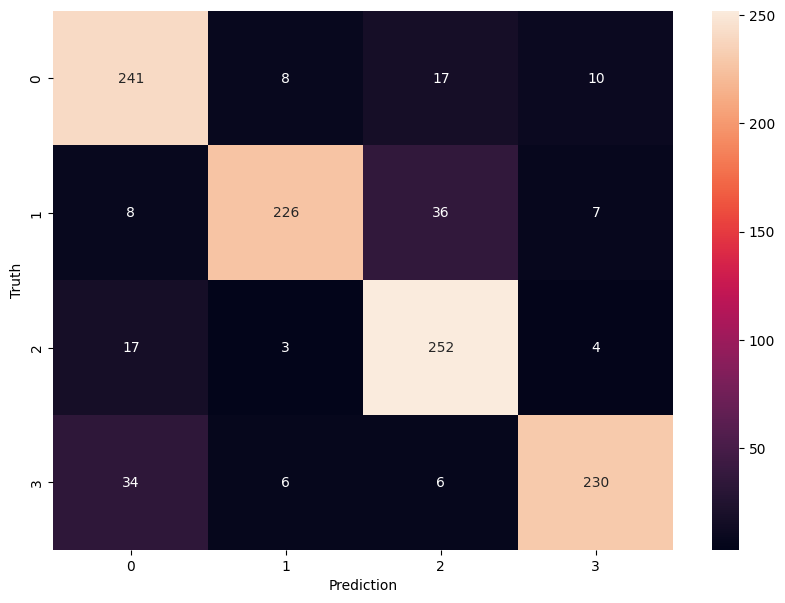

In [39]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')